# AN OVERVIEW OF THE NUMPY.RANDOM PACKAGE IN PYTHON
### AUTHOR: ANTE DUJIC

[![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/AnteDujic/Programming-for-Data-Analysis/blob/main/numpy-random.ipynb) [![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/AnteDujic/Programming-for-Data-Analysis/HEAD?labpath=https%3A%2F%2Fgithub.com%2FAnteDujic%2FProgramming-for-Data-Analysis%2Fblob%2Fmain%2Fnumpy-random.ipynb)

<hr style="border:2px solid black"> </hr>

## INTRODUCTION
<hr style="border:2px solid gray"> </hr>

This notebook contains a detail overview of the *numpy.random* package in python. It is explained how to use the package, but it also includes a detailed explanations of simple random data, permutations and some of the distributions provided for in the package. The aim of this notebook is to simplify the mentioned module explanation given on the [Official NumPy Manual website](https://numpy.org/doc/stable/reference/random/index.html).

### CONTENTS
***
- [NUMPY](#NUMPY)
    - [INSTALLATION](#INSTALLATION)
    - [IMPORT](#IMPORT)
- [NUMPY.RANDOM](#NUMPY.RANDOM)
    - [SEED](#SEED)
    - [SIMPLE RANDOM DATA](#SIMPLE_RANDOM_DATA)
        - [integers](#integers)
        - [random](#random)
        - [choice](#choice)
        - [bytes](#bytes)
    - [PERMUTATIONS](#PERMUTATIONS)
        - [shuffle](#shuffle)
        - [permutation](#permutation)
        - [permuted](#permuted)
    - [DISTRIBUTIONS](#DISTRIBUTIONS)
        - [uniform](#uniform)
        - [normal](#normal)
        - [binomal](#binomal)
        - [hypergeometric](#hypergeometric)
        - [poisson](#poisson)
    
- [CONCLUSION](#CONCLUSION)
- [REFERENCES](#REFERENCES)


## NUMPY
<hr style="border:2px solid gray"> </hr>

NumPy stands for Numerical Python and it is a core scientific computing library in Python. [1]. It is a provision for huge, multi-dimensional arrays and matrices, alongside an extra-large collection of high-level mathematical functions to work on these arrays.[2] It was created in 2005 by Travis Oliphant. It is an open source project, and the source code for NumPy is located at this github repository https://github.com/numpy/numpy. [3]


Image 1. Array shape
<center><img src="https://i.stack.imgur.com/NWTQH.png" width="500"/></center>

### INSTALLATION
***
There are multiple ways to have *NumPy* library installed on your system, but the easiest way is to use a python distribution that already has NumPy installed - e.g. [Anaconda](https://docs.anaconda.com/anaconda/install/index.html).

### IMPORT
***
*NumPy* library is imported same as any other python library, using *import* command at the start of the program. *NumPy* is usually imported using *np* alias, which is used later in the program when reffering to the package. To check the version of *NumPy* on the system type *numpy.version.version* in the terminal.

In [1]:
import numpy as np
np.version.version

'1.20.1'

#### Other Libraries used

MATPLOTLIB

In [2]:
import matplotlib.pyplot as plt

## NUMPY.RANDOM
<hr style="border:2px solid gray"> </hr>

A *random* is a module present in the *NumPy* library. This module contains the functions which are used for generating random numbers. [4] Random number does not mean a different number every time. Random means something that can not be predicted logically. [6] *Random* module is based on pseudo-random number generation that means it is a mathematical way that generates a sequence of nearly random numbers. It is a combination of a bit generator and a generator. In Python, the random values are produced by the generator and originate in a Bit generator.[5]

### SEED
***

A random seed (or seed state, or just seed) is a number (or vector) used to initialize a pseudorandom number generator. [16] It specifies the start point when a computer generates a random number sequence [17] and is generated by software using one or more values. Hardware information, time, or date are different examples of values that help generate a random value. [18] This is useful when the written code moves to production. But, if a pseudorandom number generator is reinitialized with the same seed, it will produce the same sequence of numbers. [16] It is useful for debugging purposes to use the same seed.

Since Numpy version 1.17.0 the Generator can be initialized with a number of different BitGenerators. The Generator is the user-facing object that is nearly identical to the legacy RandomState. The main difference is that the Generator uses bits provided by PCG64 which has better statistical properties than the legacy MT19937 used in RandomState.[19] MT19937 is an implementation of Mersenne Twister pseudo random number generator, developed in 1997 by Makoto Matsumoto and Takuji Nishimura. MT19937, uses a 32-bit word length. There is another implementation that uses a 64-bit word length, MT19937-64.[20] PCG (Permuted Congruential Generator) is a family of simple fast space-efficient statistically good algorithms for random number generation. Unlike many general-purpose RNGs, they are also hard to predict.[21] PCG-64 is a 128-bit implementation of O’Neill’s permutation congruential generator. [22] The legacy RandomState random number routines are still available, but limited to a single BitGenerator. [19] Some of the [differences](https://numpy.org/doc/stable/reference/random/new-or-different.html) between the two are shown on an image below.



<center>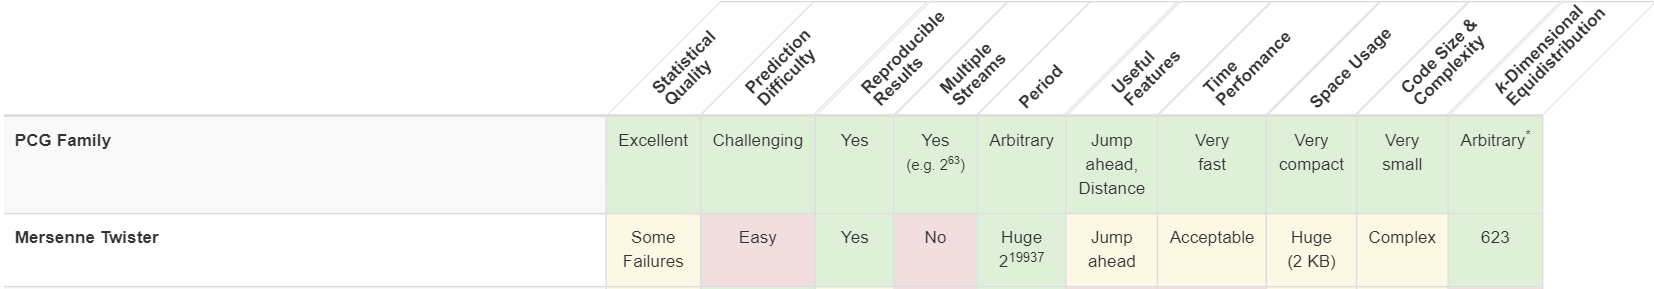</center>

Call *default_rng* to get a new instance of a Generator, then call its methods to obtain samples from different distributions.[19] Some of the methods are described further in this notebook.

In [3]:
rng = np.random.default_rng()

### SIMPLE RANDOM DATA <a id='SIMPLE_RANDOM_DATA'></a>

There are four methods to generate simple random data in current Numpy version: *integers*, *random*, *choice* and *byte*. Each is described below.
***

#### [**integers**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.integers.html#numpy.random.Generator.integers) (low, high=None, size=None, dtype=np.int64, endpoint=False) <a id='integers'></a>

Returns random integers in the specified range. ***low*** refers to the start of the range and it's inclusive. ***high*** is the end of the range and is by the default exclusive (end of range = *high* - 1). To inlcude *high* in the range, ***endpoint*** (*False* by default) has to be set up as *True*. If *high* is not specified then *low* is used as the end of the range. ***size*** defines the shape of the output and it can be one or multi-dimensional. ***dtype*** defines the dtype of the output, and it is *np.int64* by default. *Integers* returns radnom integers in "discrete uniform" distribution. A discrete uniform distribution is a statistical distribution where the probability of outcomes is equally likely and with finite values. [7]

EXAMPLES:
***

UNIFORM DISTRIBUTION OF RANDOM INTEGERS 10 - 1000000 (exclusive)

Integers: [23 35 33 ... 96 40 29] 



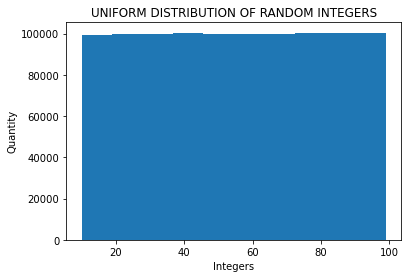

In [4]:
x_int = (rng.integers(10, 100, size=1000000))
print ("Integers:", x_int, "\n")
plt.title("UNIFORM DISTRIBUTION OF RANDOM INTEGERS")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.hist(x_int)
plt.show()

***

RANDOM INTEGERS 0 - 5 (exlusive)

Integers: [1 1 0 1 3 2 2 3 0 2] 



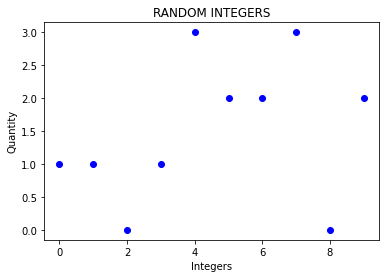

In [5]:
x1_int = (rng.integers(5, size=10))
print ("Integers:", x1_int, "\n")
plt.title("RANDOM INTEGERS")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.plot (x1_int, "bo")
plt.show()

***

RANDOM INTEGERS 0 TO 5 (inclusive)

Integers: [1 0 5 0 4 4 0 2 5 4 4 5 1 5 3 2 5 3 3 3 4 2 1 5 4 2 4 0 0 1 4 1 0 0 3 0 2
 2 5 3 5 4 3 1 0 4 2 5 1 0] 



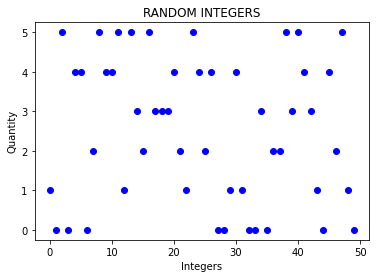

In [6]:
x2_int = (rng.integers(5, size=50, endpoint = True))
print("Integers:", x2_int, "\n")
plt.title("RANDOM INTEGERS")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.plot (x2_int, "bo")
plt.show()

***

RANDOM INTEGERS 0 - 5 (exclusive) - 2D ARRAY

2D Array:
 [[2 2 3 3 2 3 3 2 3 0]
 [3 2 3 2 4 3 2 3 3 4]
 [4 0 1 0 0 2 0 3 2 0]
 [0 4 0 1 4 0 4 1 3 3]
 [2 0 2 3 0 1 0 3 3 4]
 [2 1 4 2 4 3 0 2 3 2]
 [4 3 3 3 4 3 4 2 4 3]
 [3 1 4 0 3 4 4 1 4 3]
 [0 0 4 3 4 3 1 0 2 4]
 [4 0 0 3 1 1 2 4 2 4]] 



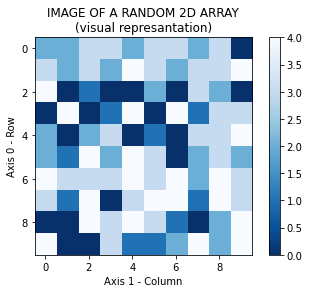

In [7]:
x3_int = (rng.integers(5, size=(10, 10)))
print ("2D Array:\n", x3_int, "\n")
plt.title("IMAGE OF A RANDOM 2D ARRAY\n(visual represantation)")
plt.xlabel("Axis 1 - Column")
plt.ylabel("Axis 0 - Row")
plt.imshow (x3_int)
color_map = plt.imshow(x3_int)
color_map.set_cmap("Blues_r")
plt.colorbar()
plt.show()

***

RANDOM INTEGERS 0 - 10 (exclusive) - 3D ARRAY

3D Array:
x =
 [[5 2 4 0 0]
 [7 5 7 8 1]
 [0 9 2 5 0]
 [9 7 1 5 7]
 [0 5 2 2 9]]
y =
 [[7 5 0 4 8]
 [3 0 0 4 4]
 [4 6 5 0 0]
 [0 3 4 8 9]
 [9 9 7 4 2]]
z =
 [[4 1 6 0 7]
 [8 1 0 7 3]
 [0 3 7 1 8]
 [2 3 1 3 5]
 [1 3 2 2 7]]


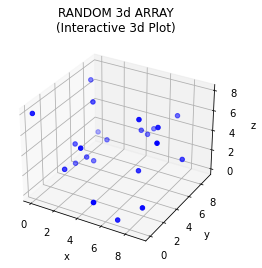

In [8]:
#%matplotlib widget
# %matplotlib inline

x4_int, y4_int, z4_int = (rng.integers(10, size=(3,5,5)))
print ("3D Array:")
print ("x =\n", x4_int)
print ("y =\n", y4_int)
print ("z =\n", z4_int)

fig = plt.figure()
ax = fig.add_subplot(projection='3d')
plt.title("RANDOM 3d ARRAY\n(Interactive 3d Plot)")
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.scatter (x4_int, y4_int, z4_int, c= 'blue')
plt.show()

# %matplotlib qt

***

ARRAY WITH THREE DIFFERENT *high* VALUES

In [9]:
rng.integers(1, [10, 50, 100])

array([ 4,  8, 42], dtype=int64)

***

ARRAY WITH THREE DIFFERENT *low* VALUES

In [10]:
rng.integers([1, 50, 90], 100)

array([23, 57, 92], dtype=int64)

***

#### [**random**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.random.html#numpy.random.Generator.random)(size=None, dtype=np.float64, out=None) <a id='random'></a>

Returns random floats in the interval higher or equal to 0.0 and less then 1.0. This interval is called half-open interval, where one of the endpoints are inclusive. ***size*** defines the output shape, which, if not specified, is none - single value is returned. ***dtype*** defines the dtype of the output and is *np.float64* by the default. Only *float64* and *float32* are supported. ***out*** ??
*return* module can also be used for custom half-open intervals, e.g. if we want the output of a radnom float between a and b, we can do the following:
> (b - a) * random() + a

The outputs are from the “continuous uniform” distribution. A continuous uniform distribution (also referred to as rectangular distribution) is a statistical distribution with an infinite number of equally likely measurable values.[7]

EXAMPLES:
***

UNIFORM DISTRIBUTION OF RANDOM INTEGERS FLOATS IN HALF OPEN INTERVAL (0,1]

Floats: [0.95282643 0.68921731 0.37540308 ... 0.41692091 0.92050715 0.58500259] 



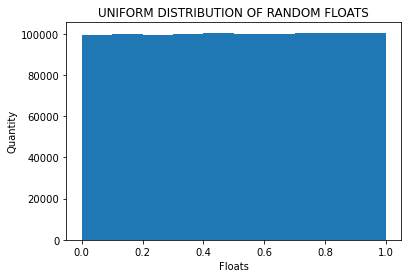

In [11]:
x_rand = (rng.random(1000000))
print ("Floats:", x_rand, "\n")

plt.title("UNIFORM DISTRIBUTION OF RANDOM FLOATS")
plt.xlabel("Floats")
plt.ylabel("Quantity")
plt.hist(x_rand)
plt.show()

***

In [12]:
rng.random()

0.364491720199859

***

RANDOM FLOATS (0, 1]

2D Array:
 [[0.38316438 0.33469201 0.02629975 0.17854049 0.43074259]
 [0.86570409 0.87043463 0.66531275 0.25254788 0.19568453]
 [0.43209258 0.4640466  0.98773375 0.99207447 0.11573736]
 [0.39599719 0.67543082 0.113103   0.91524573 0.59788457]
 [0.57053419 0.31107471 0.99578957 0.14347953 0.11113993]] 



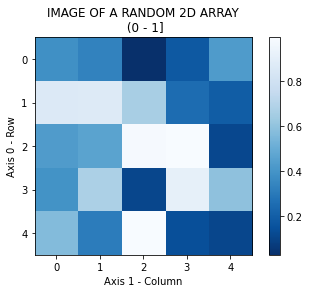

In [13]:
x1_rand = rng.random([5, 5])
print("2D Array:\n", x1_rand, "\n")
plt.imshow(x1_rand)
plt.title("IMAGE OF A RANDOM 2D ARRAY\n (0 - 1]")
plt.xlabel("Axis 1 - Column")
plt.ylabel("Axis 0 - Row")
color_map = plt.imshow(x1_rand)
color_map.set_cmap("Blues_r")
plt.colorbar()
plt.show()

***

RANDOM FLOATS (50 - 100]

2D Array:
 [[91.2971624  83.90425101 78.83877937 68.3779009  81.97537622]
 [83.02189026 72.20497412 77.94275741 80.93262472 59.35941792]
 [88.3596111  71.63390937 90.3424915  85.3302769  54.12567881]
 [99.83753756 83.06046163 62.74503871 83.9302164  89.95251258]
 [54.5330321  82.24118814 72.23998565 75.59355219 55.06811605]] 



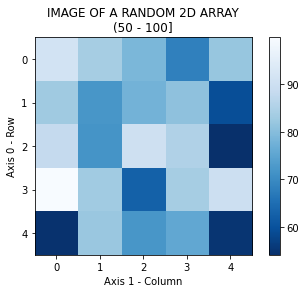

In [14]:
x2_rand = ((100-50) * rng.random((5, 5)) + 50)
print("2D Array:\n", x2_rand,"\n")
plt.imshow(x2_rand)
plt.title("IMAGE OF A RANDOM 2D ARRAY\n(50 - 100]")
plt.xlabel("Axis 1 - Column")
plt.ylabel("Axis 0 - Row")
color_map = plt.imshow(x2_rand)
color_map.set_cmap("Blues_r")
plt.colorbar()
plt.show()

***

ONE WITH out

***

#### [**choice**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.choice.html#numpy.random.Generator.choice) (a, size=None, replace=True, p=None, axis=0, shuffle=True) <a id='choice'></a>

Generates a random sample from a given array. ***a*** sets the range from which the radnom sample gets generated. If *a* is an ndarray, the output is random selection of the elements of that array. If *a* is an integer, the output is random selection of a range from 0 - given integer (exclusive). ***size*** defines the shape of the output. It is *None* by default. If *a* has more than one dimension, the size shape will be inserted into the axis dimension. ***replace*** defines if the return will have repeated elements. It is *True* by default, meaning that a value of *a* can be selected multiple times. ***p*** is the probability of the entries in *a* to be selected. By default it is *None*, meaning the probibility is equal for all - uniform distribution. ***axis*** is axis along which the selection is performed, and is *0* by default. ***shuffle*** defines if the output is shuffled when sampling without replacement. Default is *True*.

<br>

Image 1. Axis
<center><img src="https://i.stack.imgur.com/dcoE3.jpg" width="500"/></center>

EXAMPLES:
***

UNIFORM DISTRIBUTION OF RANDOM INTEGERS CHOSEN IN RANGE (0 - 10]

Integers: [0 2 0 ... 0 3 7] 



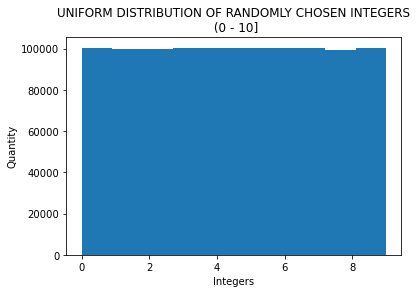

In [15]:
x_ch = (rng.choice(10,1000000))
print ("Integers:", x_ch, "\n")

plt.title("UNIFORM DISTRIBUTION OF RANDOMLY CHOSEN INTEGERS\n (0 - 10]")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.hist (x_ch)
plt.show()

***

DISTRIBUTION OF RANDOM CHOSEN INTEGERS (1,3,5,7) WITH SET PROBABILITY

Integers: [5 3 1 ... 1 3 1] 



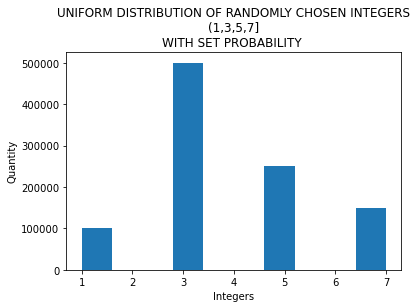

In [16]:
x1_ch = (rng.choice([1,3,5,7], 1000000, p=[0.1, 0.5, 0.25, 0.15]))
print ("Integers:", x1_ch, "\n")

plt.title("UNIFORM DISTRIBUTION OF RANDOMLY CHOSEN INTEGERS\n(1,3,5,7]\nWITH SET PROBABILITY ")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.hist (x1_ch)
plt.show()

***

In [17]:
rng.choice (100)

1

***

Integers: [3 5 2 3 0 7 7 9 1 5] 



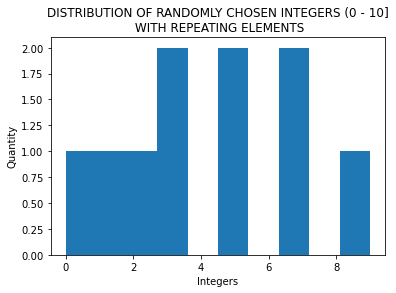

In [18]:
x2_ch = (rng.choice(10, 10))
print("Integers:", x2_ch, "\n")

plt.title("DISTRIBUTION OF RANDOMLY CHOSEN INTEGERS (0 - 10]\n WITH REPEATING ELEMENTS")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.hist(x2_ch)
plt.show()

***

Integers: [0 6 5 2 8 7 4 3 1 9] 



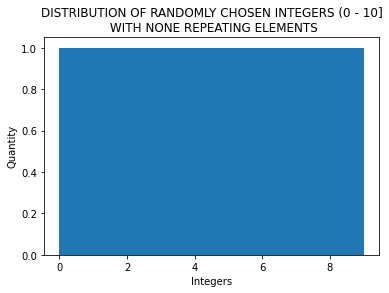

In [19]:
x3_ch = (rng.choice(10,10, replace=False))
print("Integers:", x3_ch, "\n")

plt.title("DISTRIBUTION OF RANDOMLY CHOSEN INTEGERS (0 - 10]\n WITH NONE REPEATING ELEMENTS")
plt.xlabel("Integers")
plt.ylabel("Quantity")
plt.hist(x3_ch)
plt.show()

***

In [20]:
rng.choice([[0, 1, 2], [3, 4, 5], [6, 7, 8]], 4, replace=True)

array([[6, 7, 8],
       [0, 1, 2],
       [0, 1, 2],
       [3, 4, 5]])

***

In [21]:
colors = ['red', 'blue', 'yellow', 'black']
rng.choice(colors, 10, p=[0.5, 0.1, 0.1, 0.3])

array(['black', 'red', 'red', 'black', 'black', 'red', 'red', 'red',
       'red', 'black'], dtype='<U6')

***

In [22]:
rng.choice ([[1,2,3], [10,20,30], [100,200,300]],5, axis = 0)

array([[10, 20, 30],
       [ 1,  2,  3],
       [10, 20, 30],
       [ 1,  2,  3],
       [ 1,  2,  3]])

***

In [23]:
rng.choice ([[1,2,3], [10,20,30], [100,200,300]],5, axis = 1)

array([[  2,   2,   2,   3,   2],
       [ 20,  20,  20,  30,  20],
       [200, 200, 200, 300, 200]])

***

In [24]:
rng.choice (10,10, replace = False, shuffle = True)

array([3, 1, 7, 8, 4, 0, 6, 5, 2, 9], dtype=int64)

***

In [25]:
rng.choice (10,10, replace = False, shuffle = False)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=int64)

***

2D Array:
 [[ 0  1  2  3  4]
 [ 5  6  7  8  9]
 [10 11 12 13 14]
 [15 16 17 18 19]
 [20 21 22 23 24]] 



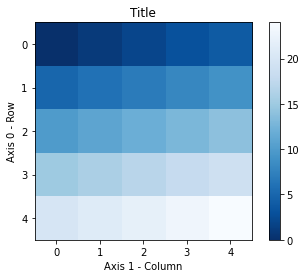

In [26]:
b = (rng.choice (25,(5,5), replace = False, shuffle = False))
print("2D Array:\n", b, "\n")
plt.title("Title")
plt.xlabel("Axis 1 - Column")
plt.ylabel("Axis 0 - Row")
plt.imshow(b)
color_map = plt.imshow(b)
color_map.set_cmap("Blues_r")
plt.colorbar()
plt.show()

***

2D Array:
 [[20 12  7 18 16]
 [ 6 17 14  3  9]
 [ 4  1 24  5 19]
 [13 22  8  2 23]
 [15 10  0 21 11]] 



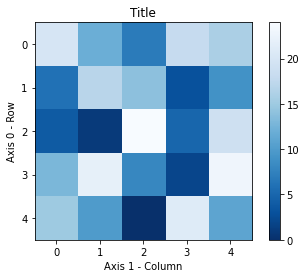

In [27]:
a = (rng.choice (25,(5,5), replace = False, shuffle = True))
print("2D Array:\n", a, "\n")
plt.title("Title")
plt.xlabel("Axis 1 - Column")
plt.ylabel("Axis 0 - Row")
plt.imshow(a)
color_map = plt.imshow(a)
color_map.set_cmap("Blues_r")
plt.colorbar()
plt.show()

#### [**bytes**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.bytes.html#numpy.random.Generator.bytes) (length) <a id='bytes'></a>

Genarates random bytes. The number of bytes is defined by ***length***.

EXAMPLES:
***

In [28]:
rng.bytes(1)

b'\x87'

***

In [29]:
rng.bytes(5)

b'\xf2\x93\xd9\x968'

***

### PERMUTATIONS

Intro + differences

***

#### [**shuffle**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.shuffle.html#numpy.random.Generator.shuffle) (x, axis=0) <a id='shuffle'></a>

Modifies an array or sequence in-place by shuffling its contents. The order of sub-arrays is changed but their contents remains the same. A subarray is a contiguous part of array, an array that is inside another array. [8] ***x*** defines the element to be shuffled. ***axis*** defines the axis which *x* is shuffled along. It is *0* by default.

EXAMPLES:
***

[0 2 5 7 9 4 6 1 3 8]


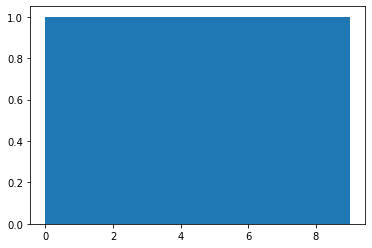

In [30]:
x_sh = np.arange(10)
rng.shuffle(x_sh)
print (x_sh)
plt.hist(x_sh)
plt.show()

***

In [31]:
x1_sh = np.arange(27).reshape((3, 3, 3))
rng.shuffle(x1_sh)
print(x1_sh)

[[[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]

 [[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]]


***

In [32]:
x2_sh = np.arange(27).reshape((3, 3, 3))
rng.shuffle(x2_sh, axis = 1)
print(x2_sh)

[[[ 6  7  8]
  [ 0  1  2]
  [ 3  4  5]]

 [[15 16 17]
  [ 9 10 11]
  [12 13 14]]

 [[24 25 26]
  [18 19 20]
  [21 22 23]]]


***

In [33]:
x3_sh = np.arange(27).reshape((3, 3, 3))
rng.shuffle(x3_sh, axis = 2)
print(x3_sh)

[[[ 0  1  2]
  [ 3  4  5]
  [ 6  7  8]]

 [[ 9 10 11]
  [12 13 14]
  [15 16 17]]

 [[18 19 20]
  [21 22 23]
  [24 25 26]]]


#### [**permutation**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permutation.html#numpy.random.Generator.permutation) (x, axis=0) <a id='permutation'></a>

Randomly permutes a sequence, or returns a permuted range. ***x*** defines the element to be permuted. If it is an integer, randomly permute *np.arange(x)*. If *x* is an array, makes a copy and shuffles the elements randomly. ***x*** is he axis which x is shuffled along and it is *0* by default.

EXAMPLES:
***

In [34]:
x_per = (rng.permutation(10))
print (x_per)

[1 8 9 5 3 6 4 7 2 0]


***

In [35]:
x1_per = (rng.permutation([1, 4, 9, 12, 15]))
print(x1_per)

[ 9 12 15  4  1]


***

In [36]:
x3_per = (np.arange(9).reshape((3, 3)))
rng.permutation(x3_per)
print (x3_per)

[[0 1 2]
 [3 4 5]
 [6 7 8]]


***

#### [**permuted**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.permuted.html#numpy.random.Generator.permuted) (x, axis=None, out=None) <a id='permuted'></a>

Randomly permute *x* along axis where each slice along the given axis is shuffled independently of the others. ***x*** is an array to be shuffled. ***axis*** defines the axis in which slices of *x* are shuffled. Each slice is shuffled independently of the others. If *axis* is *None*, the flattened array is shuffled. ***out*** defines the destinaton of the shuffled array. If it is *None*, a shuffled copy of the array is returned.

EXAMPLES:
***

In [37]:
x_perd = np.arange(24).reshape(3, 8)
print ("x(before)=\n", x_perd, "\n")
y_perd = rng.permuted(x_perd, axis=1)
print ("y=\n", y_perd, "\n")
print ("x(after)=\n", x_perd, "\n")

x(before)=
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]] 

y=
 [[ 2  0  7  5  3  4  1  6]
 [10  9 14  8 15 11 13 12]
 [17 19 23 22 20 21 16 18]] 

x(after)=
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]] 



***

In [38]:
x1_perd = np.arange(24).reshape(3, 8)
print ("x(before)=\n", x1_perd, "\n")
y1_perd = rng.permuted(x1_perd, axis=1, out = x1_perd)
print ("y=\n", y1_perd, "\n")
print ("x(after)=\n", x1_perd, "\n")

x(before)=
 [[ 0  1  2  3  4  5  6  7]
 [ 8  9 10 11 12 13 14 15]
 [16 17 18 19 20 21 22 23]] 

y=
 [[ 6  1  3  7  2  0  5  4]
 [ 8 12 10 11 13  9 15 14]
 [21 22 20 17 16 18 19 23]] 

x(after)=
 [[ 6  1  3  7  2  0  5  4]
 [ 8 12 10 11 13  9 15 14]
 [21 22 20 17 16 18 19 23]] 



***

### DISTRIBUTIONS

A data distribution is a function or a listing which shows all the possible values (or intervals) of the data. It also tells you how often each value occurs. [9] There are over 20 different types of data distributions (applied to the continuous or the discrete space) commonly used in data science to model various types of phenomena. They also have many interconnections. [10] There are 5 commonly used distributions from Numpy.random package explained below.

<center><img src="https://miro.medium.com/max/700/1*szMCjXuMDfKu6L9T9c34wg.png" width="700"/></center>

#### [**uniform**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.uniform.html#numpy.random.Generator.uniform) (low=0.0, high=1.0, size=None) <a id='uniform'></a>

A uniform distribution, sometimes also known as a rectangular distribution, is a distribution that has constant probability. [11] This means that all outcomes are equally likely to happen.

***

EXAMPLES
***

[9.79505597 0.52272334 8.71808402 ... 2.0939071  7.03518949 7.70039846]


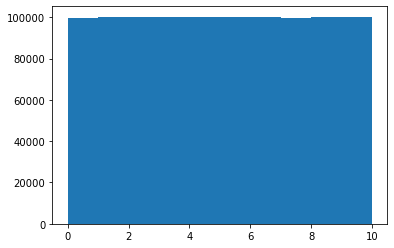

In [39]:
s_uni = np.random.default_rng().uniform(0,10,1000000)
print (s_uni)
plt.hist (s_uni)
plt.show()

***

#### [**normal**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.normal.html#numpy.random.Generator.normal) (loc=0.0, scale=1.0, size=None) <a id='normal'></a>

Normal distribution, also known as the Gaussian distribution, is a probability distribution that is symmetric about the mean, showing that data near the mean are more frequent in occurrence than data far from the mean. In graph form, normal distribution will appear as a bell curve. [12]

EXAMPLES
***

[-1.87264735  9.4193388   2.05183359 ... 15.68334932 -1.97790743
  5.13697843]


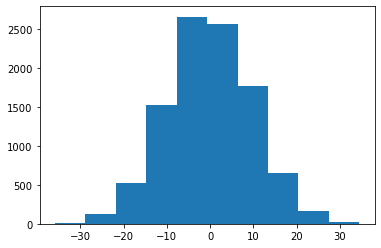

In [40]:
s_norm = np.random.default_rng().normal(0, 10, 10000)
print(s_norm)
plt.hist(s_norm)
plt.show()

***

#### [**binomal**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.binomial.html#numpy.random.Generator.binomial) (n, p, size=None) <a id='binomal'></a>

A binomial distribution can be thought of as simply the probability of a success or failure outcome in an experiment or survey that is repeated multiple times. The binomial is a type of distribution that has two possible outcomes. [13]

EXAMPLES
***

[104 104  96 ...  92  98  89]


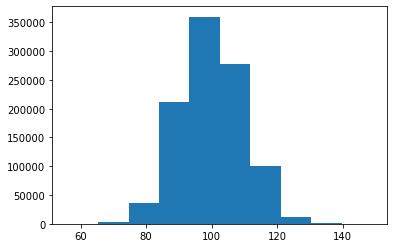

In [41]:
s_bi = rng.binomial(1000, 0.1, 1000000)
print (s_bi)
plt.hist (s_bi)
plt.show()

***

[521 478 491 ... 489 490 520]


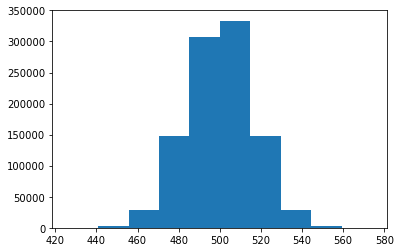

In [42]:
s1_bi = rng.binomial(1000, 0.5, 1000000)
print (s1_bi)
plt.hist (s1_bi)
plt.show()

***

[892 890 908 ... 906 901 910]


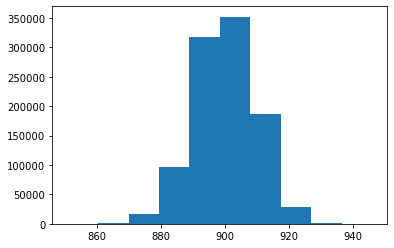

In [43]:
s2_bi = rng.binomial(1000, 0.9, 1000000)
print (s2_bi)
plt.hist (s2_bi)
plt.show()

***

#### [**hypergeometric**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.hypergeometric.html#numpy.random.Generator.hypergeometric) (ngood, nbad, nsample, size=None) <a id='hypergeometric'></a>

Hypergeometric distribution is a distribution function in which selections are made from two groups without replacing members of the groups. The hypergeometric distribution differs from the binomial distribution in the lack of replacements. [14]

EXAMPLES
***

[7 6 5 ... 4 6 5]


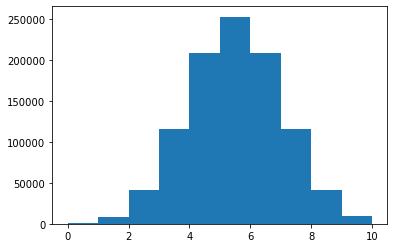

In [44]:
s_hype = (rng.hypergeometric(100, 100, 10, 1000000))
print (s_hype)
plt.hist(s_hype)
plt.show()

***

[0 0 1 ... 0 1 0]


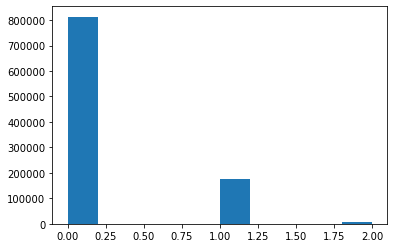

In [45]:
s1_hype = (rng.hypergeometric(2, 100, 10, 1000000))
print (s1_hype)
plt.hist(s1_hype)
plt.show()

***

[10 10 10 ... 10  9 10]


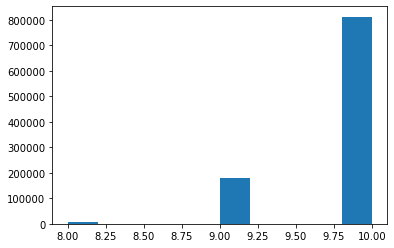

In [46]:
s3_hype = (rng.hypergeometric(100, 2, 10, 1000000))
print (s3_hype)
plt.hist(s3_hype)
plt.show()

***

#### [**poisson**](https://numpy.org/doc/stable/reference/random/generated/numpy.random.Generator.poisson.html#numpy.random.Generator.poisson) (lam=1.0, size=None) <a id='poisson'></a>

Poisson distribution is a probability distribution that is used to show how many times an event is likely to occur over a specified period. In other words, it is a count distribution. [15]

EXAMPLES
***

[5 2 4 ... 7 2 5]


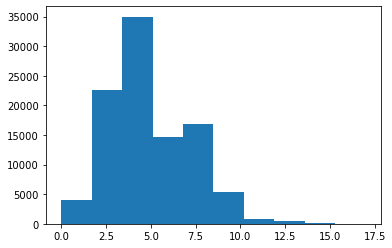

In [47]:
s_poi = (rng.poisson(5, 100000))
print(s_poi)
plt.hist (s_poi)
plt.show()

***

## CONCLUSION
***

## REFERENCES

- [1] https://towardsdatascience.com/getting-started-with-numpy-59b22df56729
- [2] https://python.plainenglish.io/what-are-basics-of-numpy-2afa9a9455cb
- [3] https://www.w3schools.com/python/numpy/numpy_intro.asp
- [4] https://www.javatpoint.com/numpy-random
- [5] https://pythonguides.com/python-numpy-random/
- [6] https://www.w3schools.com/python/numpy/numpy_random.asp
- [7] https://corporatefinanceinstitute.com/resources/knowledge/other/uniform-distribution/
- [8] https://www.geeksforgeeks.org/subarraysubstring-vs-subsequence-and-programs-to-generate-them/
- [9] https://www.statisticshowto.com/data-distribution/
- [10] https://www.kdnuggets.com/2020/06/overview-data-distributions.html
- [11] https://mathworld.wolfram.com/UniformDistribution.html
- [12] https://www.investopedia.com/terms/n/normaldistribution.asp
- [13] https://www.statisticshowto.com/probability-and-statistics/binomial-theorem/binomial-distribution-formula/
- [14] https://www.britannica.com/topic/hypergeometric-distribution
- [15] https://www.investopedia.com/terms/p/poisson-distribution.asp
- [16] https://en.wikipedia.org/wiki/Random_seed
- [17] https://www.researchgate.net/post/Can-someone-explain-what-is-seed-in-generating-a-random-number
- [18] https://www.computerhope.com/jargon/s/seed.htm
- [19] https://numpy.org/doc/stable/reference/random/index.html
- [20] https://en.wikipedia.org/wiki/Mersenne_Twister
- [21] https://hackage.haskell.org/package/pcg-random
- [22] https://numpy.org/doc/stable/reference/random/bit_generators/pcg64.html

## Links to check


- https://numpy.org/doc/stable/reference/random/index.html
- https://www.w3schools.com/python/numpy/numpy_random.asp
- https://www.geeksforgeeks.org/random-sampling-in-numpy-random-function/
- https://www.javatpoint.com/numpy-random
- https://pythonguides.com/python-numpy-random/
- https://docs.scipy.org/doc/numpy-1.17.0/reference/random/generator.html
- https://en.wikipedia.org/wiki/Discrete_uniform_distribution
- https://en.wikipedia.org/wiki/Continuous_uniform_distribution
- https://stackoverflow.com/questions/28080066/how-to-reference-a-ipython-notebook-cell-in-markdown